In [95]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

In [96]:
df = pd.read_csv("gyeonggi_data.csv",  header='infer', encoding='euc-kr')

## 전처리

In [97]:
# 기존 데이터에 인구, 기온 column을 추가한다.
# 인구, 기온 데이터 가져오기
popu_temp = pd.read_csv("population_and_temp.csv",  header='infer', encoding='euc-kr')

In [98]:
# 지점명을 기준으로 merge

df = df.merge(popu_temp, how='inner')

In [99]:
df = df.rename(columns={'지점명' : '지역명'})
df['인구'] = df['Population'].apply(lambda x : int("".join(x.split(","))))
df.drop(columns=['Population'], inplace=True)

In [100]:
# 확인
df.head()

,지역명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,평균기온,인구
0,고양시,40,103,1,26,70,6,-0.30,1079216
1,광명시,6,11,0,1,8,2,0.94,298599
2,광주시,3,6,0,2,4,0,-0.53,382054
3,김포시,3,4,0,1,3,0,0.28,473970
4,남양주시,4,5,0,0,5,0,-0.58,713321


## 분석 및 시각화

### 1. 분포 살펴보기 & 한계점

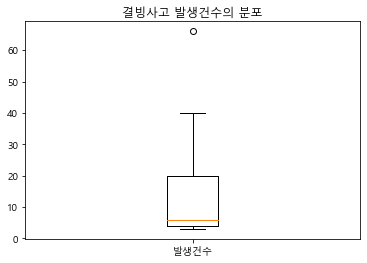

In [101]:
# 우선 결빙사고 발생건수의 분포를 Boxplot을 통해 살펴본다. 
# 이상치가 존재함을 알 수 있다. 다음의 Barchart를 통해 좀 더 자세하게 살펴본다. 

plt.boxplot(df.발생건수 , labels=["발생건수"])
plt.title("결빙사고 발생건수의 분포")
plt.savefig('결빙사고_발생건수_분포.png', dpi = 300)
plt.show()

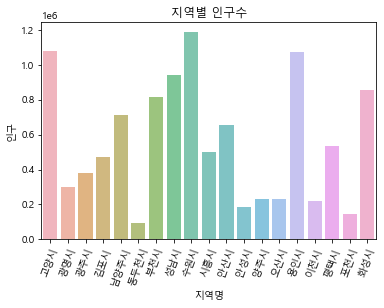

In [102]:
# 경기도 지역벌 인구수 비교
# 수원, 고양, 용인, 성남순으로 인구가 많음
# 이를 통해 인구가 많은 지역이 사고발생건수가 높을 것이라고 예상할 수 있음 

sns.barplot(x = "지역명", y = "인구", data = df, ci = None, estimator=np.sum, alpha = 0.7)
plt.title("지역별 인구수")
plt.xticks(rotation = 70 )
plt.show()

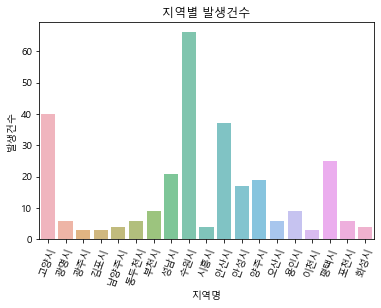

In [103]:
# 지역별 결빙사고 발생건수 비교
# 단순 발생건수는 수원, 고양, 안산, 평택 순으로 많았다.
# 예상대로 인구가 많은 수원이나 고양의 경우 발생건수가 많았다.

sns.barplot(x = "지역명", y = "발생건수", data = df, ci = None, estimator=np.sum, alpha = 0.7)
plt.title("지역별 발생건수")
plt.xticks(rotation = 70 )
plt.show()

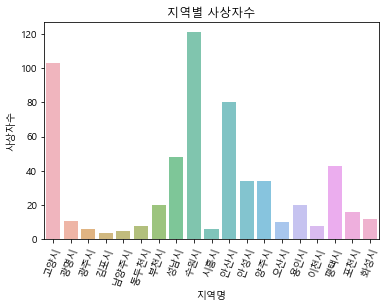

In [104]:
# 지역별 사고 사상자수 비교
# 마찬가지로 인구가 많은 지역은 사상자수도 많은 경향을 보인다.
# 따라서 정확한 분석을 위해 단순한 합계가 아닌 인구대비 비율을 구해 비교해야 한다.

sns.barplot(x = df.지역명, y = df.사상자수, data = df, ci = None, estimator= np.sum, alpha = 0.7)
plt.title("지역별 사상자수")
plt.xticks(rotation = 70 )
plt.show()

### 2. 인구 대비 비율 비교

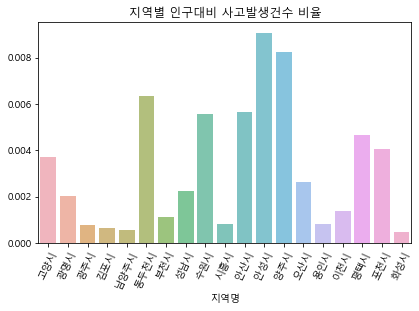

In [105]:
# 지역별 인구대비 사고발생률 비교
# 사고발생률 =  (발생건수 / 인구수)*100 로 계산함
# 단순 발생건수와는 다르게 안성, 양주, 동두천, 안산 순으로 높았다. 

sns.barplot(x = df.지역명, y = (df.발생건수 / df.인구)*100, data = df, ci = None, estimator=np.sum, alpha = 0.7)
plt.title("지역별 인구대비 사고발생건수 비율")
plt.tight_layout()
plt.xticks(rotation = 65)
#plt.savefig("인구대비_발생건수.png", dpi = 300)
plt.show()

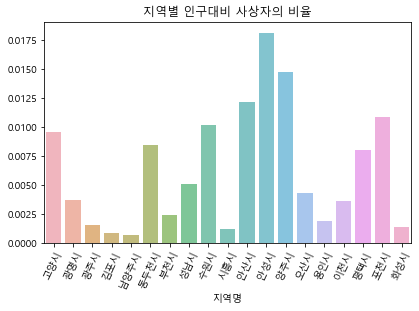

In [106]:
# 지역별 인구대비 사상자수의 비율 비교
# 사상자 비율 =  (사상자수 / 인구수)*100 로 계산함
# 단순 사상자수 비교의 결과와는 다르게, 경기도 내에서 인구가 비교적 적은 안산, 안성, 양주, 포천 등의 지역이 사상자 비율이 높았다.

sns.barplot(x = df.지역명, y = (df.사상자수 / df. 인구) * 100 , data = df, ci = None, estimator= np.sum, alpha = 0.7)
plt.title("지역별 인구대비 사상자의 비율")
plt.tight_layout()
plt.xticks(rotation = 65)
#plt.savefig("인구대비_사상자수.png", dpi = 300)
plt.show()

In [107]:
# 인구대비 사고 발생건수 비율 - Top 4 지역

df['발생건수비율'] = (df.발생건수 / df.인구)*100
df[['지역명', '발생건수비율']].sort_values("발생건수비율", ascending = False)[:4]

,지역명,발생건수비율
11,안성시,0.009090
12,양주시,0.008248
5,동두천시,0.006359
10,안산시,0.005650


In [108]:
# 인구대비 사상자수의 비율 - Top 4 지역 

df['사상자수비율'] = (df.사상자수 / df.인구)*100
df[['지역명', '사상자수비율']].sort_values("사상자수비율", ascending = False)[:4]

,지역명,사상자수비율
11,안성시,0.018181
12,양주시,0.014760
10,안산시,0.012215
17,포천시,0.010864


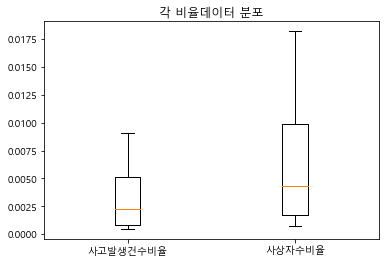

In [109]:
# 비율 데이터를 바탕으로 한 분포 파악
# 이상치가 사라졌음을 알 수 있다.

plt.boxplot([df.발생건수비율, df.사상자수비율], labels=['사고발생건수비율', '사상자수비율'], )
plt.title("각 비율데이터 분포")
plt.show()

In [110]:
# 인구대비 비율을 통한 지역간 비교가 더 적절함을 알 수 있다.
# 결론적으로 인구대비 사고발생건수와 사상자수 모두 높은 지역은 안성시, 양주시, 안산시이다. 

### 3. 상관관계 분석

In [111]:
# 각 변수간 상관관계를 분석해본다.

In [112]:
# 상관계수
df.loc[:, ["발생건수", "사상자수", "인구", "발생건수비율", "사상자수비율"]].corr()

,발생건수,사상자수,인구,발생건수비율,사상자수비율
발생건수,1.000000,0.979865,0.551679,0.488681,0.529991
사상자수,0.979865,1.000000,0.591491,0.445337,0.522222
인구,0.551679,0.591491,1.000000,-0.299331,-0.232177
발생건수비율,0.488681,0.445337,-0.299331,1.000000,0.962880
사상자수비율,0.529991,0.522222,-0.232177,0.962880,1.000000


C:\Users\Sun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


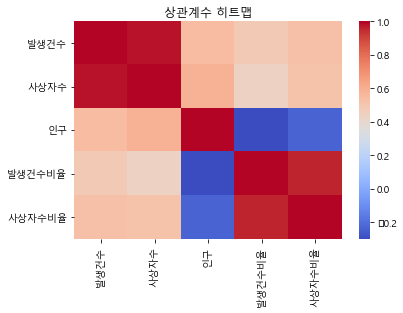

In [113]:
# 상관계수 히트맵

x = df.loc[:, ["발생건수", "사상자수", "인구", "발생건수비율", "사상자수비율"]].corr()
sns.heatmap(x, cmap = 'coolwarm')
plt.title("상관계수 히트맵")
plt.show()

In [48]:
# 결론적으로, 인구수는 단순 사고 발생건수나 사상자수와 양적 상관관계를 보였으나,
# 발생건수의 비율과 사상자수의 비율과는 음의 상관관계를 보였다. 

In [116]:
df.loc[:, ["발생건수", "사상자수", "인구", "발생건수비율", "사상자수비율", "평균기온"]].corr()

,발생건수,사상자수,인구,발생건수비율,사상자수비율,평균기온
발생건수,1.000000,0.979865,0.551679,0.488681,0.529991,0.242521
사상자수,0.979865,1.000000,0.591491,0.445337,0.522222,0.218819
인구,0.551679,0.591491,1.000000,-0.299331,-0.232177,0.420180
발생건수비율,0.488681,0.445337,-0.299331,1.000000,0.962880,-0.251925
사상자수비율,0.529991,0.522222,-0.232177,0.962880,1.000000,-0.273137
평균기온,0.242521,0.218819,0.420180,-0.251925,-0.273137,1.000000


C:\Users\Sun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


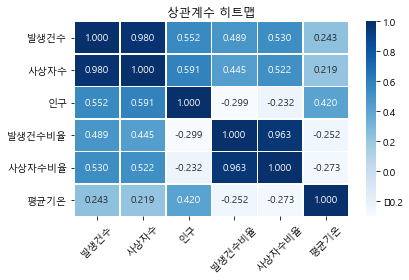

In [117]:
x = df.loc[:, ["발생건수", "사상자수", "인구", "발생건수비율", "사상자수비율", "평균기온"]].corr()
sns.heatmap(data = x, annot=True, fmt = '.3f', linewidths=.5, cmap='Blues')
plt.xticks(rotation = 45)
plt.title("상관계수 히트맵")
plt.tight_layout()
# plt.savefig("상관계수_히트맵.png", dpi = 300)
plt.show()

- 결론적으로, 인구수는 단순 사고 발생건수나 사상자수와 양적 상관관계를 보였으나, 발생건수의 비율과 사상자수의 비율과는 음의 상관관계를 보였다. 즉, 인구수가 적을 수록 인구 대비 사고 발생건수나 사상자수는 증가하는 경향을 보였다. 하지만 유의미한 크기는 아니었다. 
- 한편 평균기온이 낮아질수록 . 하지만 이 역시 유의미한 크기는 아니었다. 